In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
dat=pd.read_csv("ind_merge_MCMIS.csv",low_memory=False)

In [3]:
dat['ag']=np.where(dat['CARGO_CLASSIFICATION_CODE']=="W",0,dat['ag'])
dat['ag1']='Non_Agricultural'
dat['ag1']= np.where(dat['ag']==1,'Agricultural',dat['ag1'])
dat['ag1'].value_counts(dropna=False)

Non_Agricultural    230471
Agricultural        160944
Name: ag1, dtype: int64

In [4]:
pd.crosstab(dat["vehusedescr"],dat["ag1"])

ag1,Agricultural,Non_Agricultural
vehusedescr,,
Ambulance,58,97
"Commercial (Buses, Taxis, Common and Contract Carrier)",113796,150722
Fire,21,60
Highway Department,225,259
Military,23,28
Other,184,430
"Other Government (Postal, etc.)",99,249
"Personal (Farm, Company)",44995,74000
Police,195,311


In [5]:
dat['ag1']= np.where(dat['vehusedescr']!="Personal (Farm, Company)",'Non_Agricultural',dat['ag1'])
stat=dat['ag1'].value_counts(dropna=False)
stat

Non_Agricultural    346420
Agricultural         44995
Name: ag1, dtype: int64

In [6]:
dat['CARRIER_OPERATION'].value_counts()

A    361822
C     28325
B      1241
Name: CARRIER_OPERATION, dtype: int64

In [7]:
dat['sol_cargos']="Multi_purpose"
#dat['sol_cargos']=np.where(dat['CARGO_CLASSIFICATION_CODE']=="AA", "Agricultural Equipment",dat['sol_cargos'])
dat['sol_cargos']=np.where(dat['CARGO_CLASSIFICATION_CODE']=="P", "Grain",dat['sol_cargos'])
dat['sol_cargos']=np.where(dat['CARGO_CLASSIFICATION_CODE']=="O", "Livestock",dat['sol_cargos'])
#dat['sol_cargos']=np.where(dat['CARGO_CLASSIFICATION_CODE']=="J", "Fresh_product",dat['sol_cargos'])
#dat['sol_cargos']=np.where(dat['CARGO_CLASSIFICATION_CODE']=="R", "Meat",dat['sol_cargos'])
dat['sol_cargos']=np.where(dat['CARGO_CLASSIFICATION_CODE']=="F","Log",dat['sol_cargos'])
#dat['sol_cargos']=np.where(dat['vehusedescr']!="Personal (Farm, Company)","Non_Agricultral",dat['sol_cargos'])
dat['sol_cargos'].value_counts()

Multi_purpose    349117
Log               28591
Grain             12323
Livestock          1384
Name: sol_cargos, dtype: int64

In [8]:
pd.crosstab(dat["sol_cargos"],dat["ag1"])

ag1,Agricultural,Non_Agricultural
sol_cargos,,
Grain,3727,8596
Livestock,440,944
Log,8932,19659
Multi_purpose,31896,317221


In [9]:
cargo_types=dat.groupby(by="sol_cargos").agg({'DOT_NUMBER':"count"})
cargo_types.columns=["Carriers"]
cargo_types["Percentage"]=(cargo_types/dat.shape[0])*100
cargo_types

,Carriers,Percentage
sol_cargos,,
Grain,12323,3.148321
Livestock,1384,0.353589
Log,28591,7.304523
Multi_purpose,349117,89.193567


In [10]:
dat["Harvest_Season"]="Non_Harvest"
dat["Harvest_Season"]=np.where(dat["collision_month"]=="SEP","Harvest",dat["Harvest_Season"])
dat["Harvest_Season"]=np.where(dat["collision_month"]=="OCT","Harvest",dat["Harvest_Season"])
dat["Harvest_Season"]=np.where(dat["collision_month"]=="NOV","Harvest",dat["Harvest_Season"])
dat["Harvest_Season"]=np.where(dat["collision_month"]=="DEC","Harvest",dat["Harvest_Season"])

In [11]:
dat["Harvest_Season"].value_counts(dropna=False)

Non_Harvest    256904
Harvest        134511
Name: Harvest_Season, dtype: int64

In [12]:
dat_stat=dat.groupby(by="ag1",).agg({"deadnmb":sum,"injurednmb":sum})
dat_stats=dat_stat.T
dat_stats

ag1,Agricultural,Non_Agricultural
deadnmb,2866.0,11403.0
injurednmb,32765.0,150515.0


In [13]:
print("Fatalities per collission for agriclutural carriers=",dat_stats.Agricultural[0]/stat[1])
print("Fatalities per collission for non-agriclutural carriers=",dat_stats.Non_Agricultural[0]/stat[0])
print("Injuries per collission for agriclutural carriers=",dat_stats.Agricultural[1]/stat[1])
print("Injuries per collission for non-agriclutural carriers=",dat_stats.Non_Agricultural[1]/stat[0])

Fatalities per collission for agriclutural carriers= 0.06369596621846872
Fatalities per collission for non-agriclutural carriers= 0.03291669072224467
Injuries per collission for agriclutural carriers= 0.7281920213357039
Injuries per collission for non-agriclutural carriers= 0.4344870388545696


In [14]:
dat["weather"]="Adverse"
dat["weather"]=np.where(dat["weatherdescr"]=="Clear","Normal",dat["weather"])

In [15]:
dat["weather"].value_counts()

Normal     237908
Adverse    153507
Name: weather, dtype: int64

In [16]:
dat["fatality"]=np.where(dat["deadnmb"]>0,"Fatal","No_fatality")
dat["injury"]=np.where(dat["injurednmb"]>0,"Injuries","No_injuries")

In [17]:
dat["fatality"].value_counts(dropna=False)

No_fatality    382341
Fatal            9074
Name: fatality, dtype: int64

In [18]:
dat["injury"].value_counts(dropna=False)

No_injuries    315347
Injuries        76068
Name: injury, dtype: int64

In [19]:
dat["severity"]=np.where(dat["fatality"]=="No_fatality",np.where(dat["injury"]=="Injuries","Injury","Minor"),"Fatal")
dat["severity"].value_counts(dropna=False)

Minor     313103
Injury     69238
Fatal       9074
Name: severity, dtype: int64

In [20]:
sev_stat=pd.crosstab(dat["ag1"],dat["fatality"])
sev_stat

fatality,Fatal,No_fatality
ag1,,
Agricultural,1661,43334
Non_Agricultural,7413,339007


In [21]:
sev_stat1=pd.crosstab(dat["ag1"],dat["injury"])
sev_stat1

injury,Injuries,No_injuries
ag1,,
Agricultural,12547,32448
Non_Agricultural,63521,282899


In [22]:
print("Fatality rate per collission for agriclutural carriers=",sev_stat.Fatal[0]/stat[1])
print("Fatality rate per collission for non-agriclutural carriers=",sev_stat.Fatal[1]/stat[0])
print("Injury rate per collission for agriclutural carriers=",sev_stat1.Injuries[0]/stat[1])
print("Injury rate per collission for non-agriclutural carriers=",sev_stat1.Injuries[1]/stat[0])

Fatality rate per collission for agriclutural carriers= 0.03691521280142238
Fatality rate per collission for non-agriclutural carriers= 0.021398879972287975
Injury rate per collission for agriclutural carriers= 0.278853205911768
Injury rate per collission for non-agriclutural carriers= 0.18336412447318284


In [23]:
dat["intstat"]=np.where(dat["CARRIER_OPERATION"]=="A","Interstate","Intrastate")

In [24]:
dat.to_csv("truck_safety_final.csv")

In [2]:
data=pd.read_csv("truck_safety_final.csv")

C:\Users\Shakil\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (17,20,21,22,23,24,25,26,29,48,49,64,67,69,71,81,85,94,96,98,104,106,123,124,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dat_ag=data[data["ag1"]=='Agricultural']
dat_nag=data[data["ag1"]=='Non_Agricultural']

In [4]:
inc_ag=pd.crosstab(dat_ag["collision_month"],dat_ag["collision_year"])

In [5]:
year=list(range(2008,2018))
mon=["SEP","OCT","NOV","DEC"]

In [6]:
inc_ag_2008=sum(inc_ag[2008])/12
inc_ag_2009=sum(inc_ag[2009])/12
inc_ag_2010=sum(inc_ag[2010])/12
inc_ag_2011=sum(inc_ag[2011])/12
inc_ag_2012=sum(inc_ag[2012])/12
inc_ag_2013=sum(inc_ag[2013])/12
inc_ag_2014=sum(inc_ag[2014])/12
inc_ag_2015=sum(inc_ag[2015])/12
inc_ag_2016=sum(inc_ag[2016])/12
inc_ag_2017=sum(inc_ag[2017])/12

In [7]:
minc_ag_2008=[]
for i in range(len(mon)):
    minc_ag_2008.append(inc_ag[2008][mon[i]])

minc_ag_2009=[]
for i in range(len(mon)):
    minc_ag_2009.append(inc_ag[2009][mon[i]])

minc_ag_2010=[]
for i in range(len(mon)):
    minc_ag_2010.append(inc_ag[2010][mon[i]])

minc_ag_2011=[]
for i in range(len(mon)):
    minc_ag_2011.append(inc_ag[2011][mon[i]])

minc_ag_2012=[]
for i in range(len(mon)):
    minc_ag_2012.append(inc_ag[2012][mon[i]])

minc_ag_2013=[]
for i in range(len(mon)):
    minc_ag_2013.append(inc_ag[2013][mon[i]])

minc_ag_2014=[]
for i in range(len(mon)):
    minc_ag_2014.append(inc_ag[2014][mon[i]])

minc_ag_2015=[]
for i in range(len(mon)):
    minc_ag_2015.append(inc_ag[2015][mon[i]])

minc_ag_2016=[]
for i in range(len(mon)):
    minc_ag_2016.append(inc_ag[2016][mon[i]])

minc_ag_2017=[]
for i in range(len(mon)):
    minc_ag_2017.append(inc_ag[2017][mon[i]])

In [8]:
mon_inc_ag=[sum(minc_ag_2008)/4,sum(minc_ag_2009)/4,sum(minc_ag_2010)/4,sum(minc_ag_2011)/4,
            sum(minc_ag_2012)/4,sum(minc_ag_2013)/4,sum(minc_ag_2014)/4,sum(minc_ag_2015)/4,sum(minc_ag_2016)/4,sum(minc_ag_2017)/4]
inc_ag=[inc_ag_2008,inc_ag_2009,inc_ag_2010,inc_ag_2011,inc_ag_2012,inc_ag_2013,inc_ag_2014,inc_ag_2015,inc_ag_2016,inc_ag_2017]

In [10]:
miles=pd.read_csv("vmc.csv",sep=",")

In [11]:
harv_rate_ag=[]
for i in range(len(mon_inc_ag)):
    harv_rate_ag.append(mon_inc_ag[i]/miles.vmc[i])

In [12]:
rate_ag=[]
for i in range(len(inc_ag)):
    rate_ag.append(inc_ag[i]/miles.vmc[i])

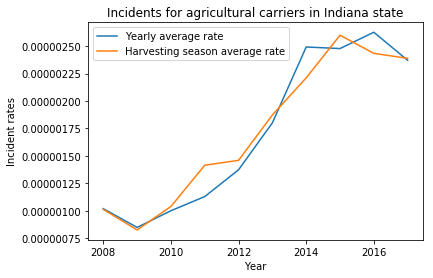

In [13]:
plt.plot(year,rate_ag,label='Yearly average rate')
plt.plot(year,harv_rate_ag,label='Harvesting season average rate')
plt.ylabel("Incident rates")
plt.xlabel("Year")
plt.legend()
plt.title("Incidents for agricultural carriers in Indiana state")
plt.show()